Loading and Displaying Well Log Data from LAS Files with Python
https://andymcdonaldgeo.medium.com/loading-and-displaying-well-log-data-b9568efd1d8
    
Loading Multiple Well Log LAS Files Using Python
https://towardsdatascience.com/loading-multiple-well-log-las-files-using-python-39ac35de99dd
    
    

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
import numpy as np

In [31]:
import lasio

In [32]:
las = lasio.read("../data/LJ-1005.LAS")

In [33]:
well = las.df()

In [34]:
well.head()

,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP
DEPT,,,,,,,,,,,
2199.9961,6.0,0.058,50.0,0.0,2.47,2.91,18.678,2.925,2.492,2.16,-0.97
2199.8438,6.0,0.059,50.0,0.0,2.47,2.91,18.843,2.886,2.491,2.16,-0.99
2199.6914,6.0,0.059,50.0,0.0,2.47,2.91,19.092,2.824,2.490,2.16,-0.92
2199.5391,6.0,0.059,50.0,0.0,2.47,2.91,19.127,2.808,2.490,2.16,-0.85
2199.3867,6.0,0.063,50.0,0.0,2.47,2.91,19.030,2.781,2.494,2.16,-0.75


In [35]:
df = well.reset_index()

In [36]:
df = df.sort_values("DEPT")

In [55]:
from datetime import datetime, timedelta

In [56]:
df["date"] = [date(2023, 1, 1) if x == 400.000 else datetime(2022,12,30,0,0,0) for x in df["DEPT"] ]

In [41]:
df["distance_diff"] = round(df["DEPT"].diff(), 4)

In [42]:
df['distance_diff'] = np.where(df['DEPT'] == 400,0, df["distance_diff"] )

In [44]:
df.head()

,DEPT,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP,date,distance_diff
11811,400.0000,9.04,NaN,111.28,45.12,14.10,0.10,NaN,NaN,NaN,0.10,40.94,2023-01-01,0.0000
11810,400.1524,9.25,NaN,117.94,48.46,11.94,0.10,NaN,NaN,NaN,2.78,28.06,2022-12-30,0.1524
11809,400.3048,9.37,NaN,119.72,50.59,10.28,0.10,NaN,NaN,NaN,0.25,20.90,2022-12-30,0.1524
11808,400.4572,9.56,NaN,118.41,54.67,5.16,10.70,NaN,NaN,NaN,1.18,8.56,2022-12-30,0.1524
11807,400.6096,9.61,NaN,116.07,56.10,3.87,6.18,NaN,NaN,NaN,2.26,4.30,2022-12-30,0.1524


In [87]:
last_date = df.iloc[0]["date"]
new_dates = []

for i, x in df.iterrows():
    sec = x["distance_diff"]*10000
    last_date += timedelta(seconds=sec)
    new_dates.append(last_date.strftime("%Y-%m-%d %X"))
    

In [88]:
df["dates_sec"] = new_dates

In [43]:
df["distance_diff"].value_counts()

0.1524    4891
0.1523    4242
0.1525    1345
0.1526    1219
0.1528     114
0.0000       1
Name: distance_diff, dtype: int64

In [89]:
df["dates_sec"]

11811    2023-01-01 00:00:00
11810    2023-01-01 00:25:24
11809    2023-01-01 00:50:48
11808    2023-01-01 01:16:12
11807    2023-01-01 01:41:36
                ...         
4        2023-07-28 06:17:47
3        2023-07-28 06:43:11
2        2023-07-28 07:08:34
1        2023-07-28 07:33:58
0        2023-07-28 07:59:21
Name: dates_sec, Length: 11812, dtype: object

In [11]:
well.notnull()

,CALI,DRHO,DT,GR,ILD,ILM,NPHI,PEF,RHOB,SFLA,SP
DEPT,,,,,,,,,,,
2199.9961,True,True,True,True,True,True,True,True,True,True,True
2199.8438,True,True,True,True,True,True,True,True,True,True,True
2199.6914,True,True,True,True,True,True,True,True,True,True,True
2199.5391,True,True,True,True,True,True,True,True,True,True,True
2199.3867,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
400.6096,True,False,True,True,True,True,False,False,False,True,True
400.4572,True,False,True,True,True,True,False,False,False,True,True
400.3048,True,False,True,True,True,True,False,False,False,True,True


In [5]:
well_nan = well.notnull() * 1

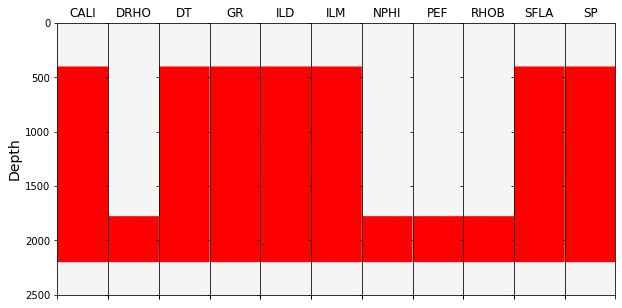

In [6]:
fig = plt.subplots(figsize=(10,5))

ax1 = plt.subplot2grid((1,11), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,11), (0,1), rowspan=1, colspan = 1)
ax3 = plt.subplot2grid((1,11), (0,2), rowspan=1, colspan = 1)
ax4 = plt.subplot2grid((1,11), (0,3), rowspan=1, colspan = 1)
ax5 = plt.subplot2grid((1,11), (0,4), rowspan=1, colspan = 1)
ax6 = plt.subplot2grid((1,11), (0,5), rowspan=1, colspan = 1)
ax7 = plt.subplot2grid((1,11), (0,6), rowspan=1, colspan = 1)
ax8 = plt.subplot2grid((1,11), (0,7), rowspan=1, colspan = 1)
ax9 = plt.subplot2grid((1,11), (0,8), rowspan=1, colspan = 1)
ax10 = plt.subplot2grid((1,11), (0,9), rowspan=1, colspan = 1)
ax11 = plt.subplot2grid((1,11), (0,10), rowspan=1, colspan = 1)

columns = well_nan.columns
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11]

for i, ax in enumerate(axes):
    ax.plot(well_nan.iloc[:,i], well_nan.index, lw=0)
    ax.set_ylim(2500, 0)
    ax.set_xlim(0, 1)
    ax.set_title(columns[i])
    ax.set_facecolor('whitesmoke')
    ax.fill_betweenx(well_nan.index, 0, well_nan.iloc[:,i], facecolor='red')
    
    if i > 0:
        plt.setp(ax.get_yticklabels(), visible = False)
    plt.setp(ax.get_xticklabels(), visible = False)
    ax1.set_ylabel('Depth', fontsize=14)

plt.subplots_adjust(wspace=0)
plt.show()

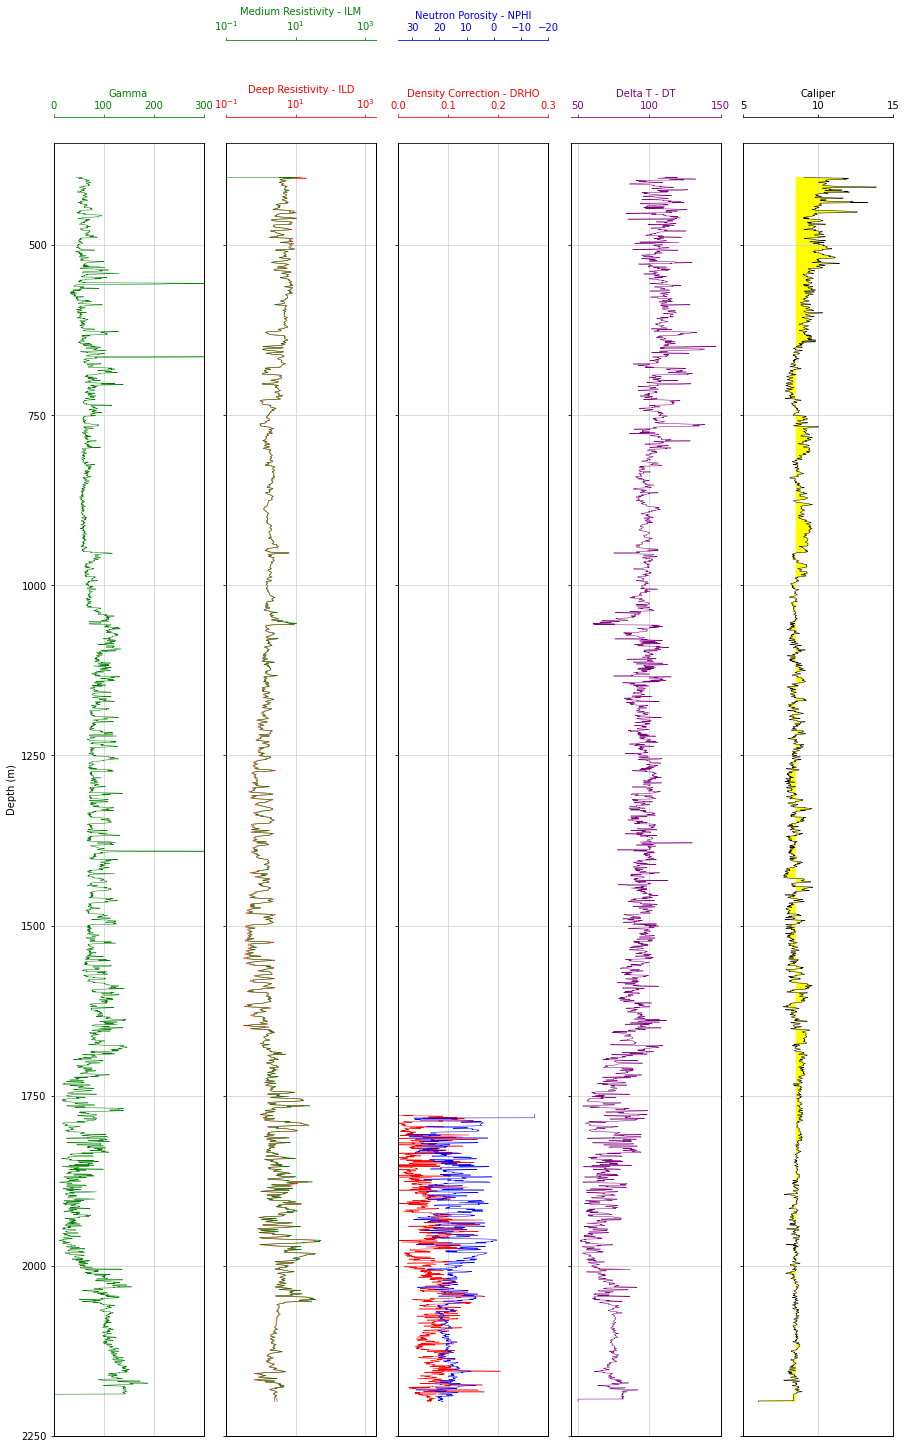

In [7]:
fig, ax = plt.subplots(figsize=(15,20))

ax1 = plt.subplot2grid((1,6), (0,0), rowspan=1, colspan = 1)
ax2 = plt.subplot2grid((1,6), (0,1), rowspan=1, colspan = 1, sharey = ax1)
ax3 = plt.subplot2grid((1,6), (0,2), rowspan=1, colspan = 1, sharey = ax1)
ax4 = plt.subplot2grid((1,6), (0,3), rowspan=1, colspan = 1, sharey = ax1)
ax5 = ax3.twiny() 
ax6 = plt.subplot2grid((1,6), (0,4), rowspan=1, colspan = 1, sharey = ax1)
ax7 = ax2.twiny()

ax10 = ax1.twiny()
ax10.xaxis.set_visible(False)
ax11 = ax2.twiny()
ax11.xaxis.set_visible(False)
ax12 = ax3.twiny()
ax12.xaxis.set_visible(False)
ax13 = ax4.twiny()
ax13.xaxis.set_visible(False)
ax14 = ax6.twiny()
ax14.xaxis.set_visible(False)

# Gamma Ray track
ax1.plot(well["GR"], well.index, color = "green", linewidth = 0.5)
ax1.set_xlabel("Gamma")
ax1.xaxis.label.set_color("green")
ax1.set_xlim(0, 300)
ax1.set_ylabel("Depth (m)")
ax1.tick_params(axis='x', colors="green")
ax1.spines["top"].set_edgecolor("green")
ax1.title.set_color('green')
ax1.set_xticks([0, 100, 200, 300])

# Deep Resistivity - ILD
ax2.plot(well["ILD"], well.index, color = "red", linewidth = 0.5)
ax2.set_xlabel("Deep Resistivity - ILD")
ax2.set_xlim(0.2, 2000)
ax2.xaxis.label.set_color("red")
ax2.tick_params(axis='x', colors="red")
ax2.spines["top"].set_edgecolor("red")
ax2.set_xticks([0.1, 1, 10, 100, 1000])
ax2.semilogx()

# Medium Resistivity - ILM
ax7.plot(well["ILM"], well.index, color = "green", linewidth = 0.5)
ax7.set_xlabel("Medium Resistivity - ILM")
ax7.set_xlim(0.2, 2000)
ax7.xaxis.label.set_color("green")
ax7.spines["top"].set_position(("axes", 1.08))
ax7.spines["top"].set_visible(True)
ax7.tick_params(axis='x', colors="green")
ax7.spines["top"].set_edgecolor("green")
ax7.set_xticks([0.1, 1, 10, 100, 1000])
ax7.semilogx()

# Density Correction - DRHO
ax3.plot(well["DRHO"], well.index, color = "red", linewidth = 0.5)
ax3.set_xlabel("Density Correction - DRHO")
ax3.set_xlim(0.0, 0.3)
ax3.xaxis.label.set_color("red")
ax3.tick_params(axis='x', colors="red")
ax3.spines["top"].set_edgecolor("red")
ax3.set_xticks([0.0, 0.1, 0.2, 0.3])

# Neutron Porosity - NPHI
ax5.plot(well["NPHI"], well.index, color = "blue", linewidth = 0.5)
ax5.set_xlabel('Neutron Porosity - NPHI')
ax5.xaxis.label.set_color("blue")
ax5.set_xlim(35, -20)
#ax5.set_ylim(4150, 3500)
ax5.tick_params(axis='x', colors="blue")
ax5.spines["top"].set_position(("axes", 1.08))
ax5.spines["top"].set_visible(True)
ax5.spines["top"].set_edgecolor("blue")
ax5.set_xticks([30, 20, 10, 0, -10, -20])

# Delta T - DT
ax4.plot(well["DT"], well.index, color = "purple", linewidth = 0.5)
ax4.set_xlabel("Delta T - DT")
ax4.set_xlim(45, 150)
ax4.xaxis.label.set_color("purple")
ax4.tick_params(axis='x', colors="purple")
ax4.spines["top"].set_edgecolor("purple")

# Caliper track
ax6.plot(well["CALI"], well.index, color = "black", linewidth = 0.5)
ax6.set_xlabel("Caliper")
ax6.set_xlim(5, 15)
ax6.xaxis.label.set_color("black")
ax6.tick_params(axis='x', colors="black")
ax6.spines["top"].set_edgecolor("black")
ax6.fill_betweenx(well_nan.index, 8.5, well["CALI"], facecolor='yellow')
ax6.set_xticks([5, 10, 15])

for ax in [ax1, ax2, ax3, ax4, ax6]:
    ax.set_ylim(2250, 350 )
    ax.grid(which='major', color='lightgrey', linestyle='-')
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.spines["top"].set_position(("axes", 1.02))

for ax in [ax2, ax3, ax4, ax6]:
    plt.setp(ax.get_yticklabels(), visible = False)

plt.tight_layout()
fig.subplots_adjust(wspace = 0.15)
plt.show()